## Introduction 

Analyzing the causes of death in Asian countries provides critical insights into the health challenges and trends within this diverse and populous region. By examining data on mortality rates and their underlying causes, researchers can identify patterns, compare different countries, and evaluate the impact of various public health interventions. 

In [4]:
#import Python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%pip install seaborn
import seaborn as sns


[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [5]:
#Read and display dataset 
df = pd.read_csv('annual_number_of_deaths_by_cause.csv')
df.head()

,Entity,Code,Year,Number of executions (Amnesty International),Deaths - Meningitis - Sex: Both - Age: All Ages (Number),Deaths - Neoplasms - Sex: Both - Age: All Ages (Number),"Deaths - Fire, heat, and hot substances - Sex: Both - Age: All Ages (Number)",Deaths - Malaria - Sex: Both - Age: All Ages (Number),Deaths - Drowning - Sex: Both - Age: All Ages (Number),Deaths - Interpersonal violence - Sex: Both - Age: All Ages (Number),...,Deaths - Protein-energy malnutrition - Sex: Both - Age: All Ages (Number),Terrorism (deaths),Deaths - Cardiovascular diseases - Sex: Both - Age: All Ages (Number),Deaths - Chronic kidney disease - Sex: Both - Age: All Ages (Number),Deaths - Chronic respiratory diseases - Sex: Both - Age: All Ages (Number),Deaths - Cirrhosis and other chronic liver diseases - Sex: Both - Age: All Ages (Number),Deaths - Digestive diseases - Sex: Both - Age: All Ages (Number),Deaths - Acute hepatitis - Sex: Both - Age: All Ages (Number),Deaths - Alzheimer's disease and other dementias - Sex: Both - Age: All Ages (Number),Deaths - Parkinson's disease - Sex: Both - Age: All Ages (Number)
0,Afghanistan,AFG,2007,15,2933.0,15925.0,481.0,393.0,2127.0,3657.0,...,2439.0,1199.0,53962.0,4490.0,7222.0,3346.0,6458.0,3437.0,1402.0,450.0
1,Afghanistan,AFG,2008,17,2731.0,16148.0,462.0,255.0,1973.0,3785.0,...,2231.0,1092.0,54051.0,4534.0,7143.0,3316.0,6408.0,3005.0,1424.0,455.0
2,Afghanistan,AFG,2009,0,2460.0,16383.0,448.0,239.0,1852.0,3874.0,...,1998.0,1065.0,53964.0,4597.0,7045.0,3291.0,6358.0,2663.0,1449.0,460.0
3,Afghanistan,AFG,2011,2,2327.0,17094.0,448.0,390.0,1775.0,4170.0,...,1805.0,1525.0,54347.0,4785.0,6916.0,3318.0,6370.0,2365.0,1508.0,473.0
4,Afghanistan,AFG,2012,14,2254.0,17522.0,445.0,94.0,1716.0,4245.0,...,1667.0,3521.0,54868.0,4846.0,6878.0,3353.0,6398.0,2264.0,1544.0,482.0


In [6]:
#Melt dataset to transform from wide to long format
df_2 = df.melt(
    id_vars=['Entity', 'Code', 'Year'],
    var_name='Causes name',
    value_name='Death Numbers'
)

In [31]:
# Explore column names
df_2['Causes name'].unique()

array(['Executions', 'Meningitis', 'Neoplasms',
       'Fire, heat, and hot substances', 'Malaria', 'Drowning',
       'Interpersonal violence', 'HIV/AIDS', 'Drug use', 'Tuberculosis',
       'Road injuries', 'Maternal disorders',
       'Lower respiratory infections', 'Neonatal disorders',
       'Alcohol use disorders', 'Exposure to forces of nature',
       'Diarrheal diseases', 'Environmental heat and cold',
       'Nutritional deficiencies', 'Self-harm', 'Conflict and terrorism',
       'Diabetes mellitus', 'Poisonings', 'Protein-energy malnutrition',
       'Terrorism', 'Cardiovascular diseases', 'kidney disease',
       'Respiratory disease',
       'Cirrhosis and other chronic liver diseases', 'Digestive diseases',
       'Acute hepatitis', "Alzheimer's disease and other dementias",
       "Parkinson's disease"], dtype=object)

In [8]:
# Clean and rename the columns 
df_2['Causes Description'] = df_2['Causes name']
df_2 = df_2[['Entity', 'Code', 'Year', 'Causes name', 'Causes Description', 'Death Numbers']]

In [9]:
#use mapping dictionary to rename "Causes name" column 
cause_name_mapping = {'Number of executions (Amnesty International)': 'Executions',
                     'Deaths - Meningitis - Sex: Both - Age: All Ages (Number)': 'Meningitis',
                     'Deaths - Neoplasms - Sex: Both - Age: All Ages (Number)': 'Neoplasms',
                     'Deaths - Fire, heat, and hot substances - Sex: Both - Age: All Ages (Number)': 'Fire, heat, and hot substances',
                    'Deaths - Malaria - Sex: Both - Age: All Ages (Number)': 'Malaria',
                    'Deaths - Drowning - Sex: Both - Age: All Ages (Number)': 'Drowning',
                    'Deaths - Interpersonal violence - Sex: Both - Age: All Ages (Number)': 'Interpersonal violence',
                    'Deaths - HIV/AIDS - Sex: Both - Age: All Ages (Number)': 'HIV/AIDS',
                    'Deaths - Drug use disorders - Sex: Both - Age: All Ages (Number)': 'Drug use',
                    'Deaths - Tuberculosis - Sex: Both - Age: All Ages (Number)': 'Tuberculosis',
                    'Deaths - Road injuries - Sex: Both - Age: All Ages (Number)': 'Road injuries',
                    'Deaths - Maternal disorders - Sex: Both - Age: All Ages (Number)': 'Maternal disorders',
                    'Deaths - Lower respiratory infections - Sex: Both - Age: All Ages (Number)': 'Lower respiratory infections',
                    'Deaths - Neonatal disorders - Sex: Both - Age: All Ages (Number)': 'Neonatal disorders',
                    'Deaths - Alcohol use disorders - Sex: Both - Age: All Ages (Number)': 'Alcohol use disorders',
                    'Deaths - Exposure to forces of nature - Sex: Both - Age: All Ages (Number)': 'Exposure to forces of nature',
                    'Deaths - Diarrheal diseases - Sex: Both - Age: All Ages (Number)': 'Diarrheal diseases',
                    'Deaths - Environmental heat and cold exposure - Sex: Both - Age: All Ages (Number)': 'Environmental heat and cold',
                    'Deaths - Nutritional deficiencies - Sex: Both - Age: All Ages (Number)': 'Nutritional deficiencies',
                    'Deaths - Self-harm - Sex: Both - Age: All Ages (Number)': 'Self-harm',
                    'Deaths - Conflict and terrorism - Sex: Both - Age: All Ages (Number)': 'Conflict and terrorism',
                    'Deaths - Diabetes mellitus - Sex: Both - Age: All Ages (Number)': 'Diabetes mellitus',
                    'Deaths - Poisonings - Sex: Both - Age: All Ages (Number)': 'Poisonings',
                    'Deaths - Protein-energy malnutrition - Sex: Both - Age: All Ages (Number)': 'Protein-energy malnutrition',
                    'Terrorism (deaths)': 'Terrorism',
                    'Deaths - Cardiovascular diseases - Sex: Both - Age: All Ages (Number)': 'Cardiovascular diseases',
                    'Deaths - Chronic kidney disease - Sex: Both - Age: All Ages (Number)': 'kidney disease',
                    'Deaths - Chronic respiratory diseases - Sex: Both - Age: All Ages (Number)': 'Respiratory disease',
                    'Deaths - Cirrhosis and other chronic liver diseases - Sex: Both - Age: All Ages (Number)': 'Cirrhosis and other chronic liver diseases',
                    'Deaths - Digestive diseases - Sex: Both - Age: All Ages (Number)': 'Digestive diseases',
                    'Deaths - Acute hepatitis - Sex: Both - Age: All Ages (Number)': 'Acute hepatitis',
                    "Deaths - Alzheimer's disease and other dementias - Sex: Both - Age: All Ages (Number)": "Alzheimer's disease and other dementias",
                    "Deaths - Parkinson's disease - Sex: Both - Age: All Ages (Number)": "Parkinson's disease"
                     }

# Apply the mapping to shorten the cause names
df_2['Causes name'] = df_2['Causes name'].replace(cause_name_mapping)

In [10]:
# Display the unique countries in the dataset
unique_countries = df_2['Entity'].unique()
unique_countries

array(['Afghanistan', 'Africa', 'African Region', 'African Union',
       'Albania', 'Algeria', 'America', 'American Samoa',
       'Andean Latin America', 'Andorra', 'Angola', 'Antigua and Barbuda',
       'Argentina', 'Armenia', 'Asia', 'Australasia',
       'Australasia & Oceania', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Bosnia-Herzegovina', 'Botswana',
       'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Caribbean',
       'Central African Republic', 'Central America & Caribbean',
       'Central Asia', 'Central Europe',
       'Central Europe, Eastern Europe, and Central Asia',
       'Central Latin America', 'Central sub-Saharan Africa', 'Chad',
       'Chile', 'China', 'Colombia', 'Commonwealth',
       'Commonwealth High Income', 'Commonwealth Lo

In [11]:
# List of Asian countries
asian_countries = [
    'Afghanistan', 'Armenia', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Bhutan', 'Brunei', 
    'Cambodia', 'China', 'Cyprus', 'Georgia', 'India', 'Indonesia', 'Iran', 'Iraq', 
    'Israel', 'Japan', 'Jordan', 'Kazakhstan', 'Kuwait', 'Kyrgyzstan', 'Laos', 'Lebanon', 
    'Malaysia', 'Maldives', 'Mongolia', 'Myanmar', 'Nepal', 'North Korea', 'Oman', 
    'Pakistan', 'Palestine', 'Philippines', 'Qatar', 'Saudi Arabia', 'Singapore', 
    'South Korea', 'Sri Lanka', 'Syria', 'Tajikistan', 'Thailand', 'Timor-Leste', 
    'Turkey', 'Turkmenistan', 'United Arab Emirates', 'Uzbekistan', 'Vietnam', 'Yemen'
]

# Filter the DataFrame to include only Asian countries
asia_df = df_2[df_2['Entity'].isin(asian_countries)]

In [12]:
asia_df.head()

,Entity,Code,Year,Causes name,Causes Description,Death Numbers
0,Afghanistan,AFG,2007,Executions,Number of executions (Amnesty International),15
1,Afghanistan,AFG,2008,Executions,Number of executions (Amnesty International),17
2,Afghanistan,AFG,2009,Executions,Number of executions (Amnesty International),0
3,Afghanistan,AFG,2011,Executions,Number of executions (Amnesty International),2
4,Afghanistan,AFG,2012,Executions,Number of executions (Amnesty International),14


In [13]:
asia_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46530 entries, 0 to 272303
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Entity              46530 non-null  object
 1   Code                46530 non-null  object
 2   Year                46530 non-null  int64 
 3   Causes name         46530 non-null  object
 4   Causes Description  46530 non-null  object
 5   Death Numbers       44652 non-null  object
dtypes: int64(1), object(5)
memory usage: 2.5+ MB


In [14]:
#Checking for null values
asia_df.isnull().sum()

Entity                   0
Code                     0
Year                     0
Causes name              0
Causes Description       0
Death Numbers         1878
dtype: int64

In [15]:
# Dropping null values
asia_df = asia_df.dropna()

In [16]:
# Verify null values were removed
asia_df.isnull().sum()

Entity                0
Code                  0
Year                  0
Causes name           0
Causes Description    0
Death Numbers         0
dtype: int64

In [17]:
#Check for duplicated rows
asia_df.duplicated().value_counts()

False    44652
dtype: int64

In [18]:
#Drop Execution deaths
asia_df = asia_df[asia_df['Causes name'] != 'Executions']

## Research Questions

## What are the leading causes of death in Asian countries?

In [19]:
# Aggregate data to find total deaths by cause in Asian countries
cause_of_death_summary = asia_df.groupby('Causes name')['Death Numbers'].sum().reset_index()

# Sort the causes by the total number of deaths in descending order
leading_causes_of_death = cause_of_death_summary.sort_values(by='Death Numbers', ascending=False)

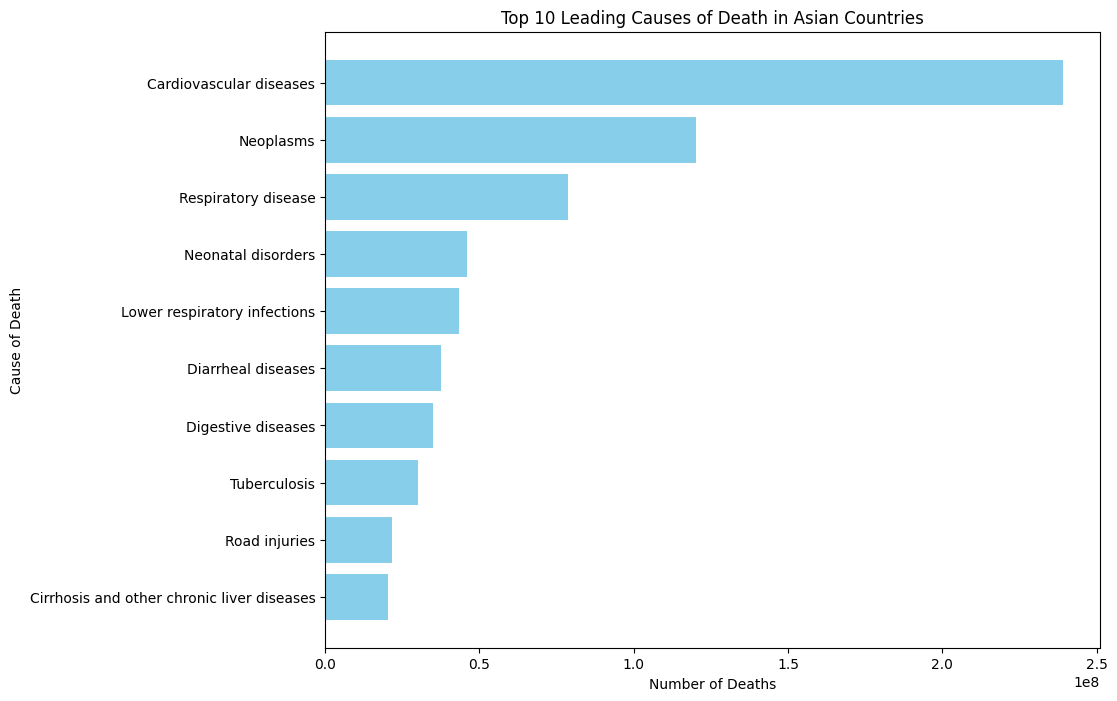

In [20]:
# Get the top 10 causes of death
top_10_causes = leading_causes_of_death.head(10)

# Plot the top 10 causes of death
plt.figure(figsize=(10, 8))
plt.barh(top_10_causes['Causes name'], top_10_causes['Death Numbers'], color='skyblue')
plt.xlabel('Number of Deaths')
plt.ylabel('Cause of Death')
plt.title('Top 10 Leading Causes of Death in Asian Countries')
plt.gca().invert_yaxis()
plt.show()

## How have death rates from infectious diseases changed in Asian countries over time?

In [21]:
# List of infectious diseases
infectious_diseases = ['Tuberculosis', 'HIV/AIDS', 'Malaria']

# Filter for the specified causes of death
infectious_df = asia_df[asia_df['Causes name'].isin(infectious_diseases)]

# Aggregate data to find total deaths by year and cause
yearly_deaths = infectious_df.groupby(['Year', 'Causes name'])['Death Numbers'].sum().reset_index()

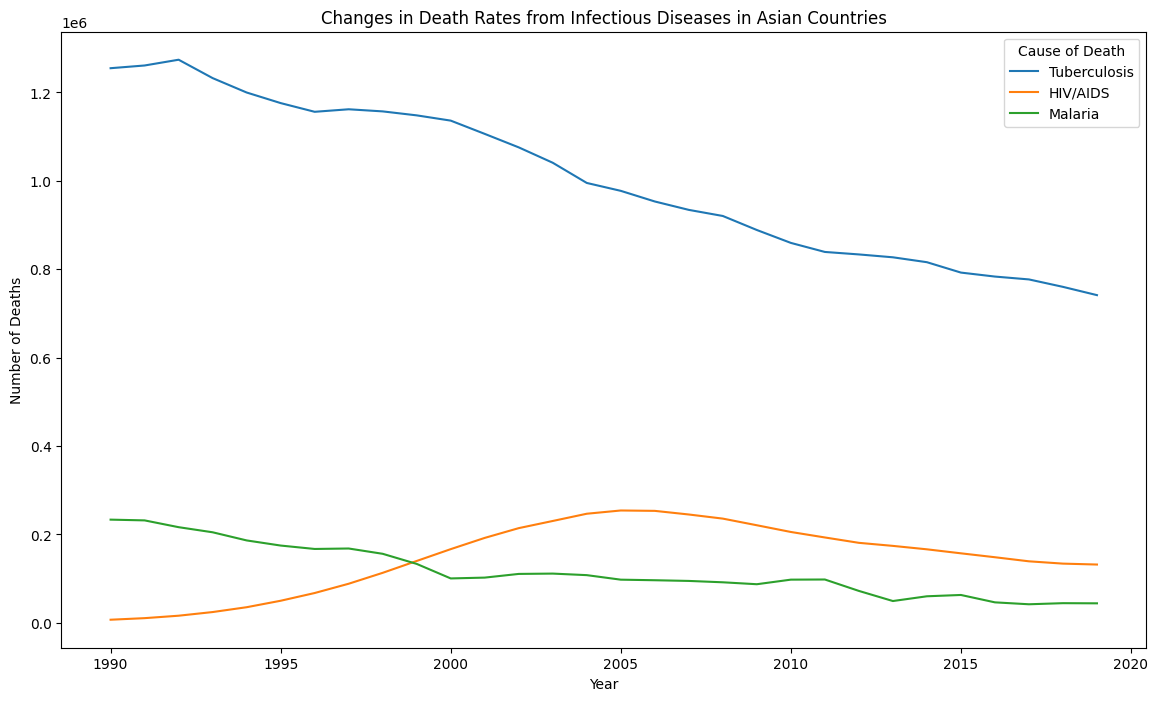

In [22]:
plt.figure(figsize=(14, 8))

for disease in infectious_diseases:
    subset = yearly_deaths[yearly_deaths['Causes name'] == disease]
    plt.plot(subset['Year'], subset['Death Numbers'], label=disease)
    
plt.xlabel('Year')
plt.ylabel('Number of Deaths')
plt.title('Changes in Death Rates from Infectious Diseases in Asian Countries')
plt.legend(title='Cause of Death')
plt.show()

## Which Asian countries have seen the most significant improvement in reducing mortality rates for infectious diseases?

In [24]:
# Calculate total deaths for each country, year, and cause
grouped = infectious_df.groupby(['Entity', 'Year', 'Causes name'])['Death Numbers'].sum().reset_index()

# Get the first and last year in the dataset
first_year = grouped['Year'].min()
last_year = grouped['Year'].max()

# Separate data for the first and last year
first_year_data = grouped[grouped['Year'] == first_year]
last_year_data = grouped[grouped['Year'] == last_year]

# Merge the dataframes on country and cause to calculate improvements
merged = pd.merge(first_year_data, last_year_data, on=['Entity', 'Causes name'], suffixes=('_first', '_last'))

# Calculate the improvement in deaths
merged['Improvement'] = merged['Death Numbers_first'] - merged['Death Numbers_last']

# Sort by improvement
significant_improvements = merged.sort_values(by='Improvement', ascending=False)

# Get the top countries with the most significant improvements
top_countries = significant_improvements.groupby('Causes name').head(5)
top_countries.head(5)
#print(top_countries[['Entity', 'Causes name', 'Improvement']])

,Entity,Year_first,Causes name,Death Numbers_first,Year_last,Death Numbers_last,Improvement
35,India,1990,Tuberculosis,613999.0,2019,422634.0,191365.0
26,China,1990,Tuberculosis,177459.0,2019,36566.0,140893.0
34,India,1990,Malaria,162369.0,2019,33372.0,128997.0
14,Bangladesh,1990,Tuberculosis,80729.0,2019,29086.0,51643.0
38,Indonesia,1990,Tuberculosis,128009.0,2019,76549.0,51460.0


/tmp/ipykernel_31/3016008431.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_countries['Improvement'] = pd.to_numeric(top_countries['Improvement'], errors='coerce')


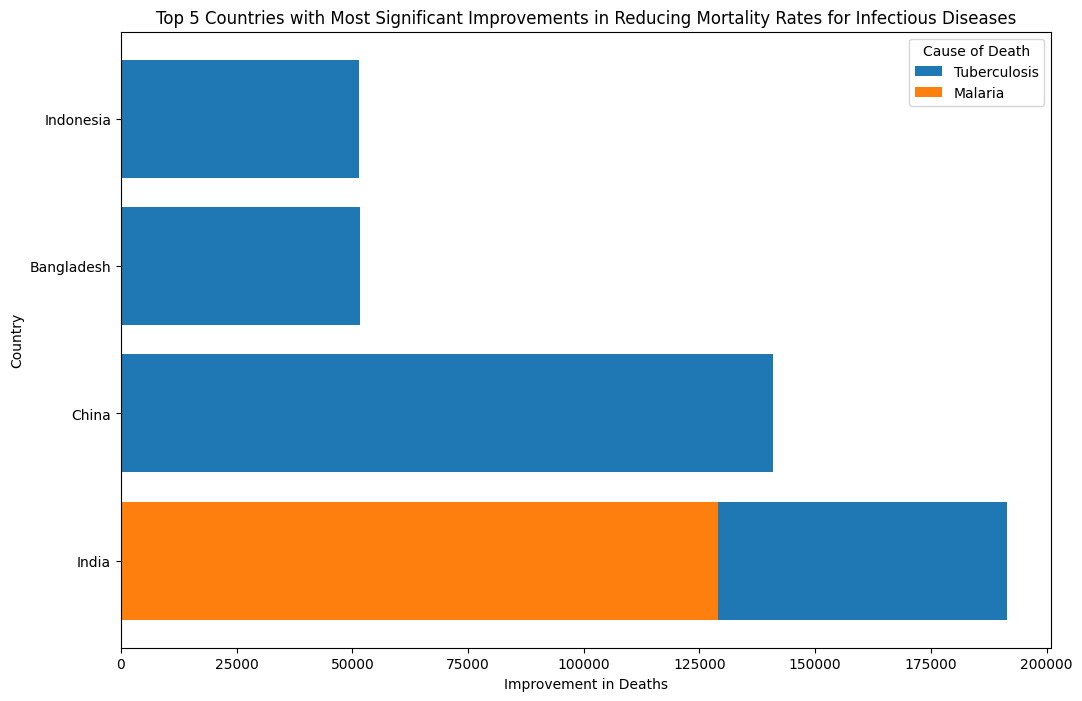

In [25]:
# Convert 'Improvement' to numeric
top_countries['Improvement'] = pd.to_numeric(top_countries['Improvement'], errors='coerce')

# Limit to top 5 overall countries with the most significant improvements
top_overall_countries = top_countries.nlargest(5, 'Improvement')

# Plotting
plt.figure(figsize=(12, 8))
for cause in top_overall_countries['Causes name'].unique():
    cause_data = top_overall_countries[top_overall_countries['Causes name'] == cause]
    plt.barh(cause_data['Entity'], cause_data['Improvement'], label=cause)

# Add titles and labels
plt.title('Top 5 Countries with Most Significant Improvements in Reducing Mortality Rates for Infectious Diseases')
plt.xlabel('Improvement in Deaths')
plt.ylabel('Country')
plt.legend(title='Cause of Death')

# Show plot
plt.show()

## How have death rates from Non-Communicable Diseases changed in Asian countries over time?

In [28]:
# List of infectious diseases
nc_diseases = ['Cardiovascular diseases', 'Diabetes mellitus', 'Neoplasms','kidney disease', 'Respiratory disease', 'Cirrhosis and other chronic liver diseases','Digestive diseases',"Alzheimer's disease and other dementias","Parkinson's disease"]

# Filter for the specified causes of death
nc_df = asia_df[asia_df['Causes name'].isin(nc_diseases)]

# Aggregate data to find total deaths by year and cause
yearly_deaths_nc = nc_df.groupby(['Year', 'Causes name'])['Death Numbers'].sum().reset_index()

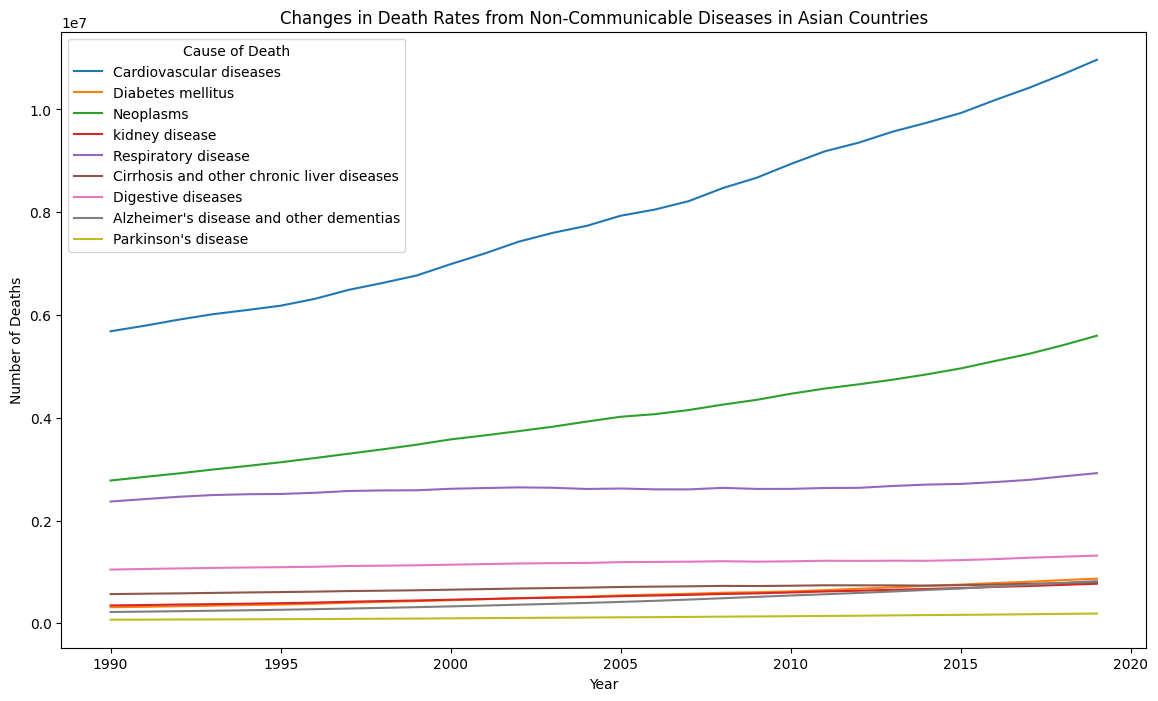

In [29]:
plt.figure(figsize=(14, 8))

for disease in nc_diseases:
    subset = yearly_deaths_nc[yearly_deaths_nc['Causes name'] == disease]
    plt.plot(subset['Year'], subset['Death Numbers'], label=disease)
    
plt.xlabel('Year')
plt.ylabel('Number of Deaths')
plt.title('Changes in Death Rates from Non-Communicable Diseases in Asian Countries')
plt.legend(title='Cause of Death')
plt.show()